# Calculating the similarity matrix and using it to fit an SVM

### Importing packages

In [4]:
import numpy as np
import pandas as pd
import utils
import matplotlib.pyplot as plt
from sklearn.svm import SVC

### Plotting functions

In [36]:
# Some functions to plot our points and draw the lines
def plot_points(features, labels):
    X = np.array(features)
    y = np.array(labels)
    spam = X[np.argwhere(y==1)]
    ham = X[np.argwhere(y==0)]
    plt.scatter([s[0][0] for s in spam],
                   [s[0][1] for s in spam],
                   s = 35,
                   color = 'cyan',
                   edgecolor = 'k',
                   marker = '^')
    plt.scatter([s[0][0] for s in ham],
                   [s[0][1] for s in ham],
                   s = 25,
                   color = 'red',
                   edgecolor = 'k',
                   marker = 's')
    plt.xlabel('x_1')
    plt.ylabel('x_2')
    plt.legend(['label 1','label 0'])

def plot_model(X, y, model):
    X = np.array(X)
    y = np.array(y)
    plot_step = 0.01
    x_min, x_max = X[:, 0].min() - 1, X[:, 0].max() + 1
    y_min, y_max = X[:, 1].min() - 1, X[:, 1].max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                         np.arange(y_min, y_max, plot_step))
    Z = model.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    plt.contour(xx, yy, Z,colors = 'k',linewidths = 3)
    plot_points(X, y)
    plt.contourf(xx, yy, Z, colors=['red', 'blue'], alpha=0.2, levels=range(-1,2))
    plt.show()

In [13]:
data = pd.DataFrame({
    'x1': [0,-1,0,0,1,-1,1],
    'x2': [0,0,-1,1,0,1,-1],
    'y': [0,0,0,1,1,1,1]
})
data

,x1,x2,y
0,0,0,0
1,-1,0,0
2,0,-1,0
3,0,1,1
4,1,0,1
5,-1,1,1
6,1,-1,1


In [14]:
data[['x1','x2']]

,x1,x2
0,0,0
1,-1,0
2,0,-1
3,0,1
4,1,0
5,-1,1
6,1,-1


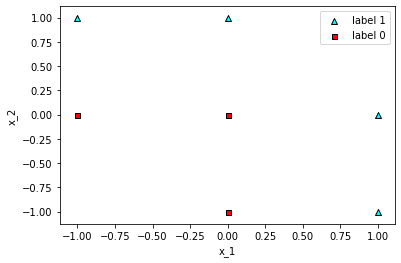

In [15]:
plot_points((data[['x1','x2']]), (data['y']))

### Calculating the similarity matrix

In [16]:
def similarity(x, y):
    return np.exp(-(x[0]-y[0])**2-(x[1]-y[1])**2)

In [19]:
data_with_similarities = data.copy()

# Compute all pairwise similarities
for i in range(len(data)):
    column = []
    for j in range(len(data)):
        first = [data.loc[i, 'x1'], data.loc[i, 'x2']]
        second = [data.loc[j, 'x1'], data.loc[j, 'x2']]
        column.append(similarity(first, second))
    data_with_similarities[f'Sim{i}'] = column

data_with_similarities

,x1,x2,y,Sim0,Sim1,Sim2,Sim3,Sim4,Sim5,Sim6
0,0,0,0,1.000000,0.367879,0.367879,0.367879,0.367879,0.135335,0.135335
1,-1,0,0,0.367879,1.000000,0.135335,0.135335,0.018316,0.367879,0.006738
2,0,-1,0,0.367879,0.135335,1.000000,0.018316,0.135335,0.006738,0.367879
3,0,1,1,0.367879,0.135335,0.018316,1.000000,0.135335,0.367879,0.006738
4,1,0,1,0.367879,0.018316,0.135335,0.135335,1.000000,0.006738,0.367879
5,-1,1,1,0.135335,0.367879,0.006738,0.367879,0.006738,1.000000,0.000335
6,1,-1,1,0.135335,0.006738,0.367879,0.006738,0.367879,0.000335,1.000000


### Fitting a (linear) SVM to the similarity matrix

In [20]:
X = data_with_similarities.drop(columns=['y'])
y = data_with_similarities['y']

svm = SVC(kernel='linear')
svm = SVC(kernel='linear')
svm.fit(X, y)

SVC(C=1.0, break_ties=False, cache_size=200, class_weight=None, coef0=0.0,
    decision_function_shape='ovr', degree=3, gamma='scale', kernel='linear',
    max_iter=-1, probability=False, random_state=None, shrinking=True,
    tol=0.001, verbose=False)

In [21]:
svm.coef_

array([[ 0.67476187,  0.67482825, -1.09720887, -0.64636729, -0.64708568,
         0.01538266,  0.01603589,  0.67770347,  0.6776795 ]])

### Plotting the classifier (Work in progress)